In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade kneed


In [3]:
pip install -U scikit-learn scipy matplotlib

In [4]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import mixture 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from kneed import KneeLocator
import seaborn as sns

df = pd.read_csv('../data/QueryGrosera_v4.csv', encoding= "latin_1")
df

,Reserva,Tipo_Habitacion,Clasificacion_tipo_habitacion,Paquete,Canal,Agencia,Estatus_res,Capacidad_hotel,Numero_personas,Numero_adultos,Numero_men,Numero_noches,Numero_habitaciones,IngresoMto,FechaRegistro,FechaLlegada,FechaSalida
0,6576,ESTD C/BALCON SN12ASB,ASB,WALK IN ...,FAX ...,SUNWING VACATIONS ...,SALIDA,735,1,1,0,1,1,101.60,2019-12-10,2020-01-15,2020-01-16
1,82869,MV LUXURY 1K SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20
2,82868,MV LUXURY 2Q SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,3,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20
3,62469,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,LADA 800 NACIONAL68 ...,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.12,2019-02-22,2019-02-22,2019-02-24
4,63254,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,MULTIVACACIONES 1,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.70,2019-02-12,2019-02-13,2019-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79981,63042,LUXURY 1K SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,RESERVACION EN TRANSICION,735,2,2,0,1,1,132946.80,2019-03-14,2019-03-14,2019-03-14
79982,40799,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,RESERVACION O (R)REGISTRO,735,2,2,0,28,1,145544.00,2020-03-21,2021-01-13,2021-02-10
79983,60997,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,SALIDA,735,2,2,0,52,1,166296.00,2019-02-12,2019-02-13,2019-04-06
79984,52804,MASTER SUITE 1KSN12GMS,GMS,WALK IN ...,LADA 800 NACIONAL68 ...,CLIENTES PARTICULARES ...,SALIDA,735,2,2,0,63,1,201474.00,2019-07-17,2020-01-11,2020-03-14


In [5]:
def remove_outliers(df, column_name, threshold=3):
    """
    Remove rows with outliers in a specific column of a DataFrame.
    
    Parameters:
        - df: pandas DataFrame
            The DataFrame containing the data.
        - column_name: str
            The name of the column to check for outliers.
        - threshold: int or float, optional (default=3)
            The number of standard deviations away from the mean to consider as an outlier.
    
    Returns:
        - pandas DataFrame
            The DataFrame with the outliers removed.
    """
    mean = np.mean(df[column_name])
    std = np.std(df[column_name])
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

def is_high_season(date):
    year = date.year
        #verano, asueto revolución, invierno, asueto constitución, asueto petróleo
    if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
       (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
       (pd.Timestamp(year=year, month=12, day=18) <= date <= pd.Timestamp(year=year+1, month=1, day=5)) or \
       (pd.Timestamp(year=year, month=2, day=3) <= date <= pd.Timestamp(year=year, month=2, day=5)) or \
       (pd.Timestamp(year=year, month=3, day=16) <= date <= pd.Timestamp(year=year, month=3, day=18)) or \
        (pd.Timestamp(year=year, month=3, day=25) <= date <= pd.Timestamp(year=year, month=4, day=7)):
        return 'temporada alta'
    return 'temporada baja'

df_no_out = remove_outliers(df, "IngresoMto", threshold=3)

df_no_out['FechaLlegada'] = pd.to_datetime(df_no_out['FechaLlegada'])

df_no_out['Tipo_temporada'] = df_no_out['FechaLlegada'].apply(is_high_season)

df_no_out['Diferencia_reservacion_llegada'] = pd.to_datetime(df_no_out['FechaLlegada']) - pd.to_datetime(df['FechaRegistro'])

df_no_out

C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\2719864988.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_out['FechaLlegada'] = pd.to_datetime(df_no_out['FechaLlegada'])
C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\2719864988.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_out['Tipo_temporada'] = df_no_out['FechaLlegada'].apply(is_high_season)
C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\2719864988.py:42: SettingWithCopyWarning: 
A value is trying to be set on 

,Reserva,Tipo_Habitacion,Clasificacion_tipo_habitacion,Paquete,Canal,Agencia,Estatus_res,Capacidad_hotel,Numero_personas,Numero_adultos,Numero_men,Numero_noches,Numero_habitaciones,IngresoMto,FechaRegistro,FechaLlegada,FechaSalida,Tipo_temporada,Diferencia_reservacion_llegada
0,6576,ESTD C/BALCON SN12ASB,ASB,WALK IN ...,FAX ...,SUNWING VACATIONS ...,SALIDA,735,1,1,0,1,1,101.60,2019-12-10,2020-01-15,2020-01-16,temporada baja,36 days
1,82869,MV LUXURY 1K SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20,temporada baja,89 days
2,82868,MV LUXURY 2Q SN12GSU,GSU,WALK IN ...,MULTIVACACIONES 2,RESORT ADVANTAGE ...,SALIDA,735,3,2,0,4,1,109.44,2019-03-19,2019-06-16,2019-06-20,temporada baja,89 days
3,62469,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,LADA 800 NACIONAL68 ...,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.12,2019-02-22,2019-02-22,2019-02-24,temporada baja,0 days
4,63254,JR SUITE 1K SN12MJS,MJS,NINGUNO ...,MULTIVACACIONES 1,RESORT ADVANTAGE ...,SALIDA,735,2,2,0,2,1,113.70,2019-02-12,2019-02-13,2019-02-15,temporada baja,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79212,84742,LUXURY 2Q SN12GSU,GSU,WALK IN ...,INTERNET ...,HOTELES S.A.,SALIDA,735,3,3,0,5,1,26520.15,2019-07-12,2019-07-17,2019-07-22,temporada alta,5 days
79213,55939,LUXURY 2Q SN12GSU,GSU,WALK IN ...,INTERNET ...,HOTELES S.A.,RESERVACION O (R)REGISTRO,735,2,2,0,4,1,26521.04,2020-03-12,2020-12-28,2021-01-01,temporada alta,291 days
79214,1379,LUXURY 2Q SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,SALIDA,735,2,2,0,6,1,26527.44,2019-03-19,2019-12-26,2020-01-01,temporada alta,282 days
79215,1378,LUXURY 1K SN12GSU,GSU,WALK IN ...,LADA 800 NACIONAL68 ...,PRICETRAVEL HOLDING ...,SALIDA,735,2,2,0,6,1,26527.56,2019-03-19,2019-12-26,2020-01-01,temporada alta,282 days


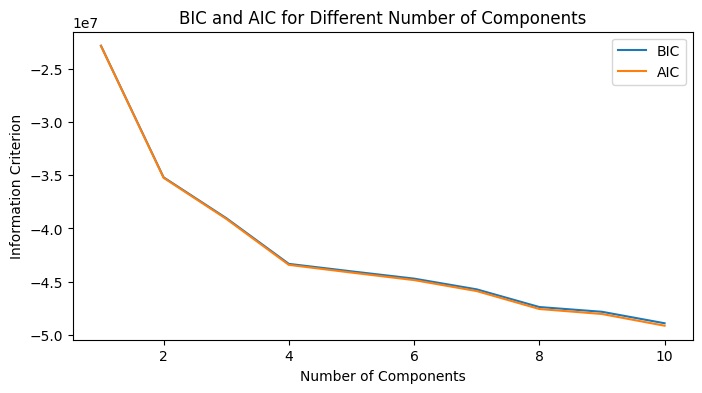

Optimal number of components according to BIC: 4
Optimal number of components according to AIC: 4


In [6]:
#Asumiendo que df_no_out ya está definido y limpio
columns_to_use = ['Tipo_Habitacion', 'Clasificacion_tipo_habitacion', 'Paquete', 'Canal', 'Estatus_res', 'Capacidad_hotel', 'Numero_personas', 'Numero_adultos', 'Numero_noches', 'IngresoMto', 'Tipo_temporada']
df_selected = df_no_out[columns_to_use]

#Preprocesamiento con OneHotEncoder para variables categóricas y StandardScaler para ingresos
categorical_features = ['Tipo_Habitacion', 'Clasificacion_tipo_habitacion', 'Paquete', 'Canal', 'Estatus_res', "Tipo_temporada"]
numeric_features = ['Capacidad_hotel', 'Numero_personas', 'Numero_adultos', 'Numero_noches', 'IngresoMto']


categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Preprocesar los datos
data_transformed = preprocessor.fit_transform(df_selected)

#Suponiendo que 'data_transformed' podría ser disperso debido a one-hot encoding
if isinstance(data_transformed, np.ndarray):
    data_dense = data_transformed  
else:
    data_dense = data_transformed.toarray()  

#Realizar el análisis de codo
n_components = np.arange(1, 11)  
bics = []
aics = []
for n in n_components:
    gmm = mixture.GaussianMixture(n_components = n, random_state = 42)
    gmm.fit(data_dense)
    bics.append(gmm.bic(data_dense))
    aics.append(gmm.aic(data_dense))

#Plot BIC and AIC
plt.figure(figsize=(8, 4))
plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.title('BIC and AIC for Different Number of Components')
plt.show()

#Encuentra el número óptimo de componentes utilizando KneeLocator
knee_bic = KneeLocator(n_components, bics, curve = 'convex', direction = 'decreasing')
knee_aic = KneeLocator(n_components, aics, curve = 'convex', direction = 'decreasing')

print('Optimal number of components according to BIC:', knee_bic.elbow)
print('Optimal number of components according to AIC:', knee_aic.elbow)


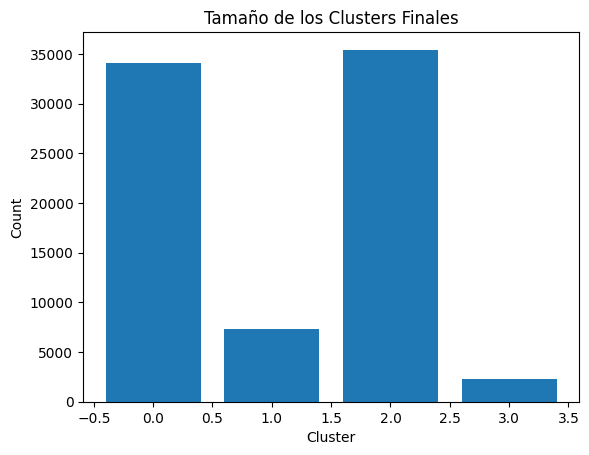

In [7]:
def to_dense(X):
    if isinstance(X, np.ndarray):
        return X
    else:
        return X.toarray()

#Define dense_transformer que utiliza la función to_dense
dense_transformer = FunctionTransformer(to_dense, accept_sparse=True)

#Preprocesamiento de características numéricas
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('to_dense', dense_transformer)  
])

#Preprocesamiento de características categóricas
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ('to_dense', dense_transformer)  
])

#Combinar el preprocesamiento de datos numéricos y categóricos
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

#Definir y ajustar modelo final
pipeline_final = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', dense_transformer), 
    ('clusterer', mixture.GaussianMixture(n_components = knee_bic.elbow, random_state = 42))
])

pipeline_final.fit(df_selected)

#Predecir las etiquetas del cluster
labels_final = pipeline_final.predict(df_selected)

#Visualizar el tamaño de los clusters
plt.hist(labels_final, bins=range(knee_bic.elbow + 1), align = 'left', rwidth = 0.8)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Tamaño de los Clusters Finales')
plt.show()

C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\483094841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = labels_final
C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\483094841.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=col, data=df_selected, ax=axes[i], ci=None)
C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\483094841.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=col, data=df_selected, ax=axes[i], ci=None)
C:\Users\Taurino LG\AppData\Local\Temp\ipykernel_7272\483094841.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `e

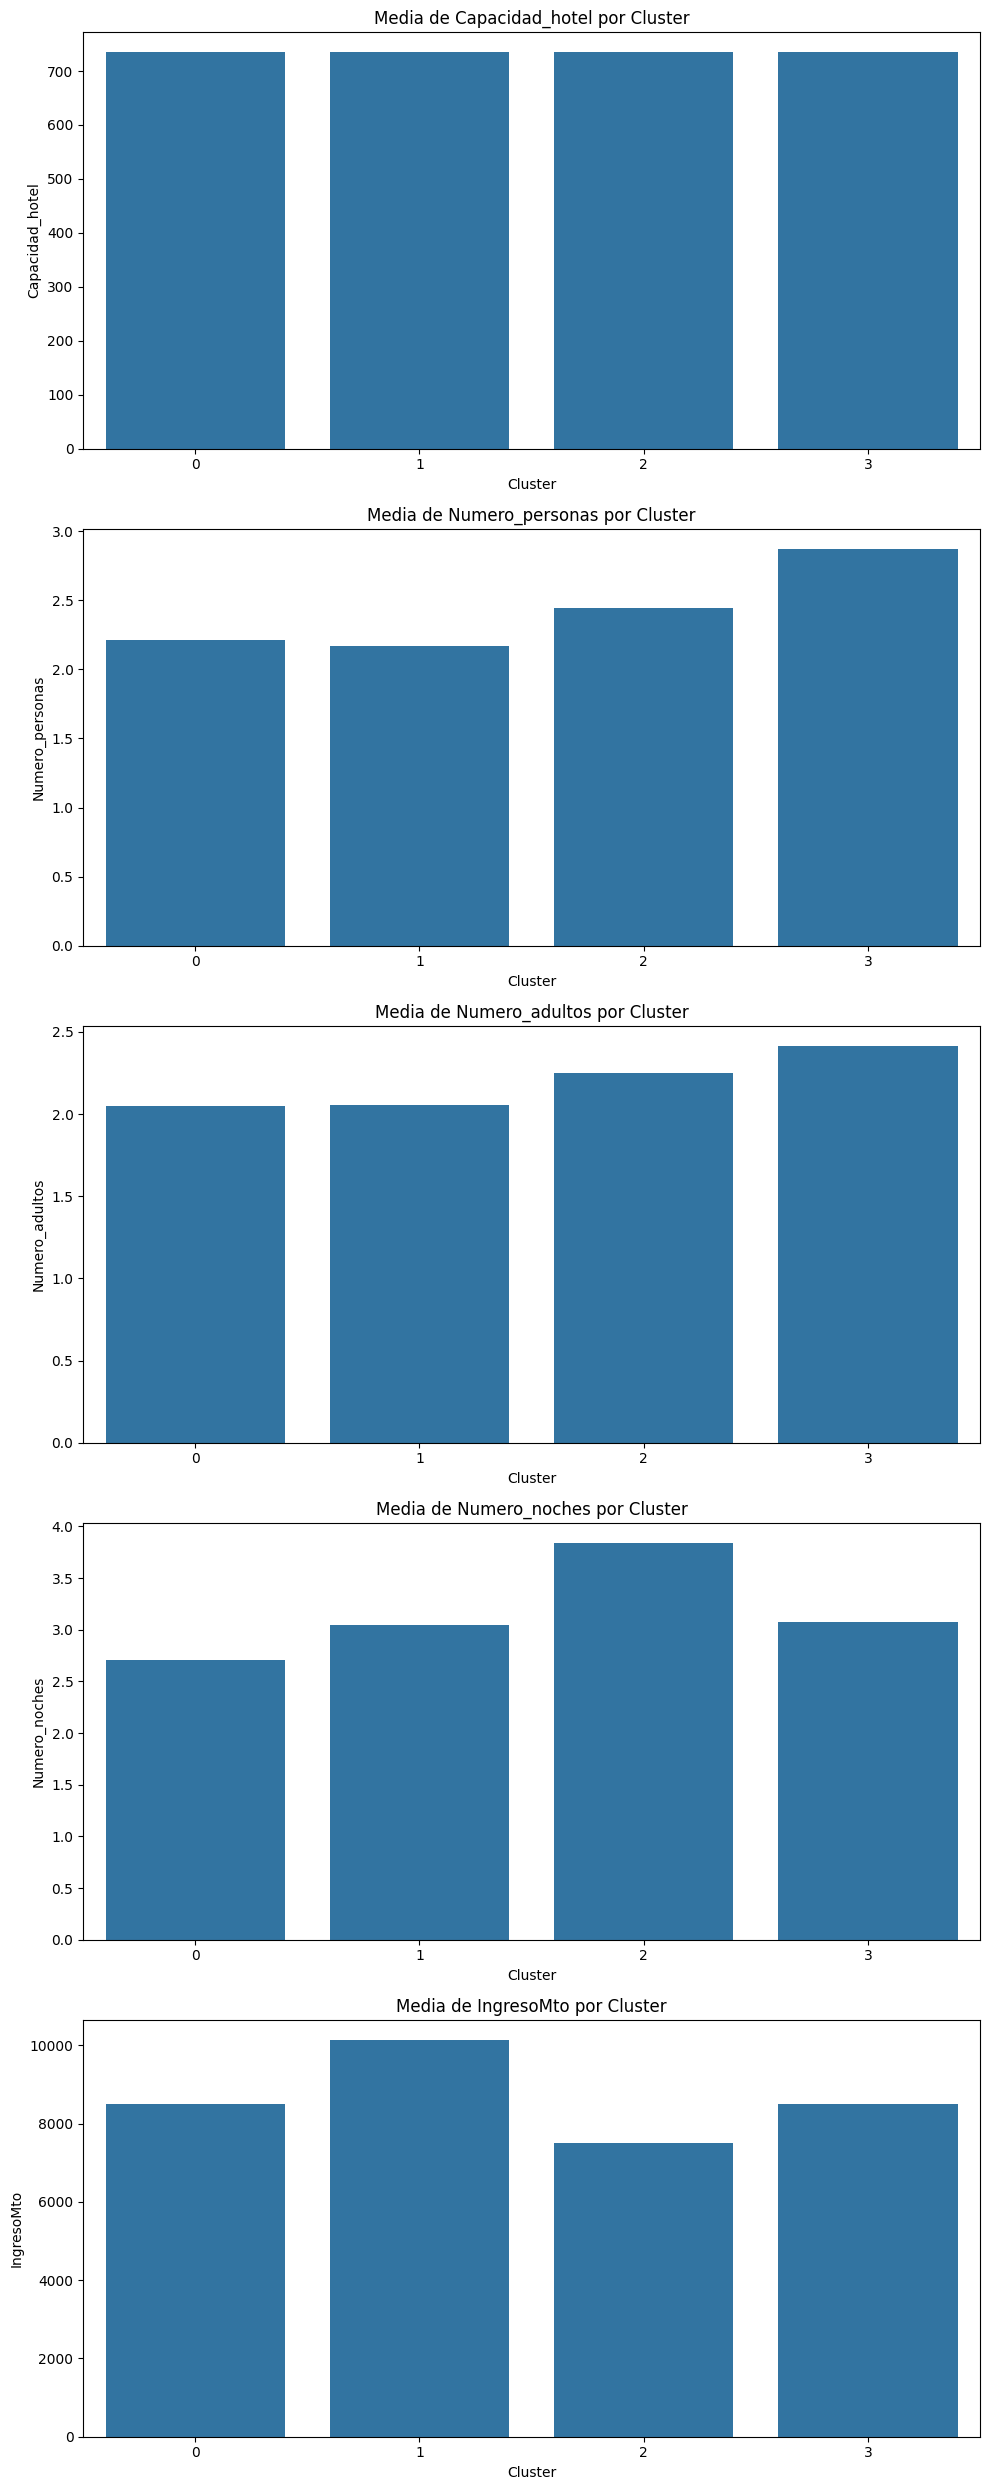

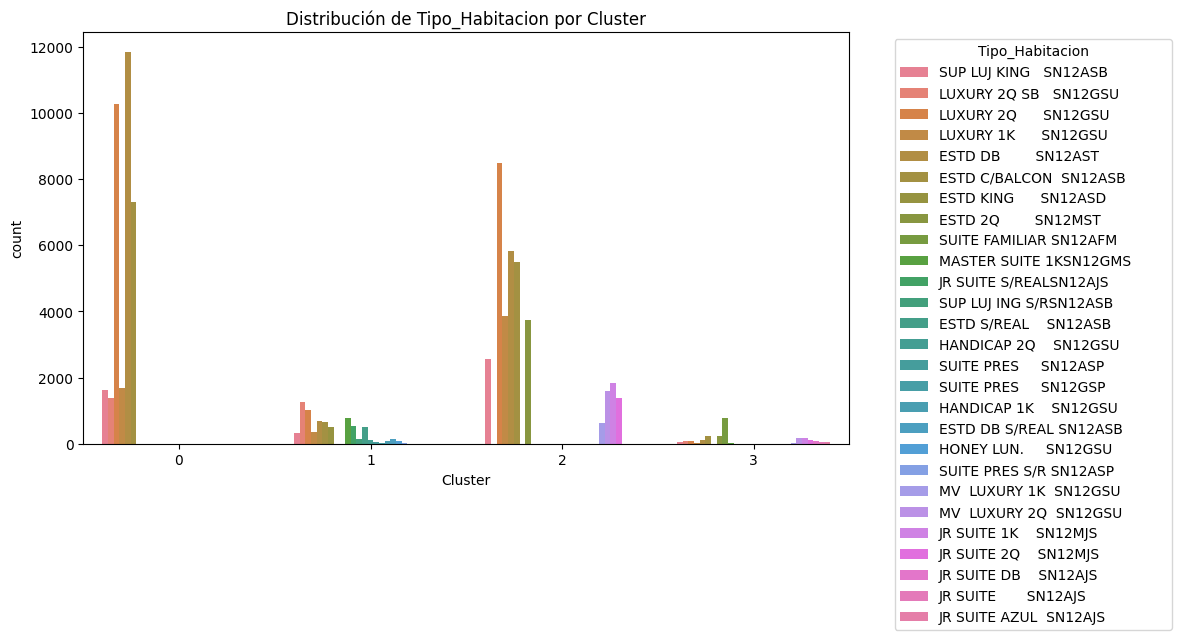

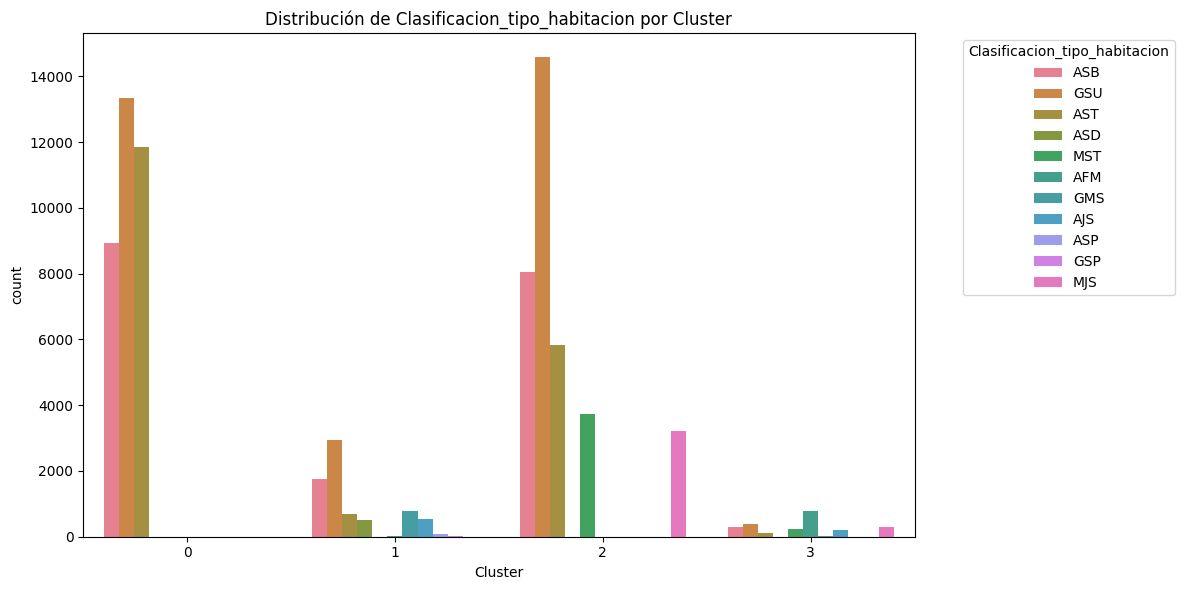

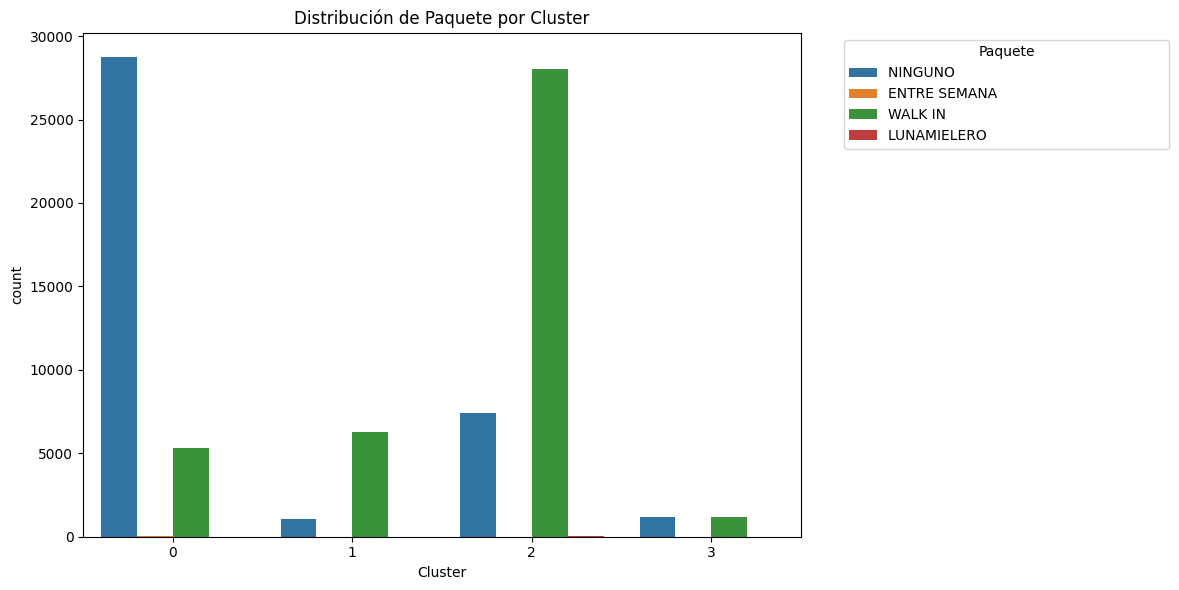

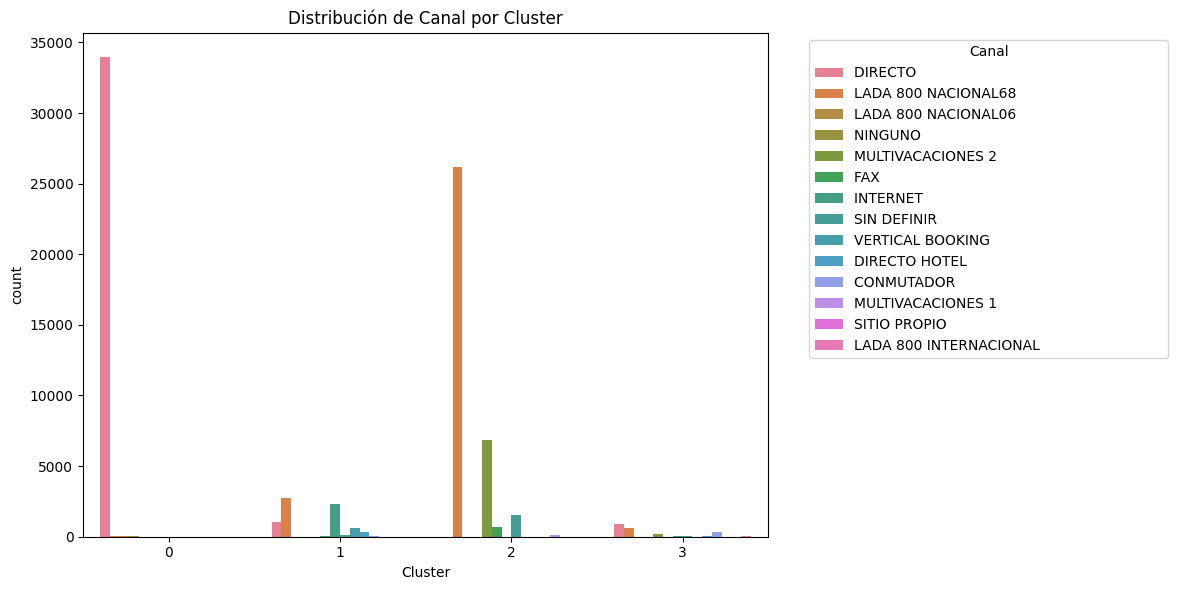

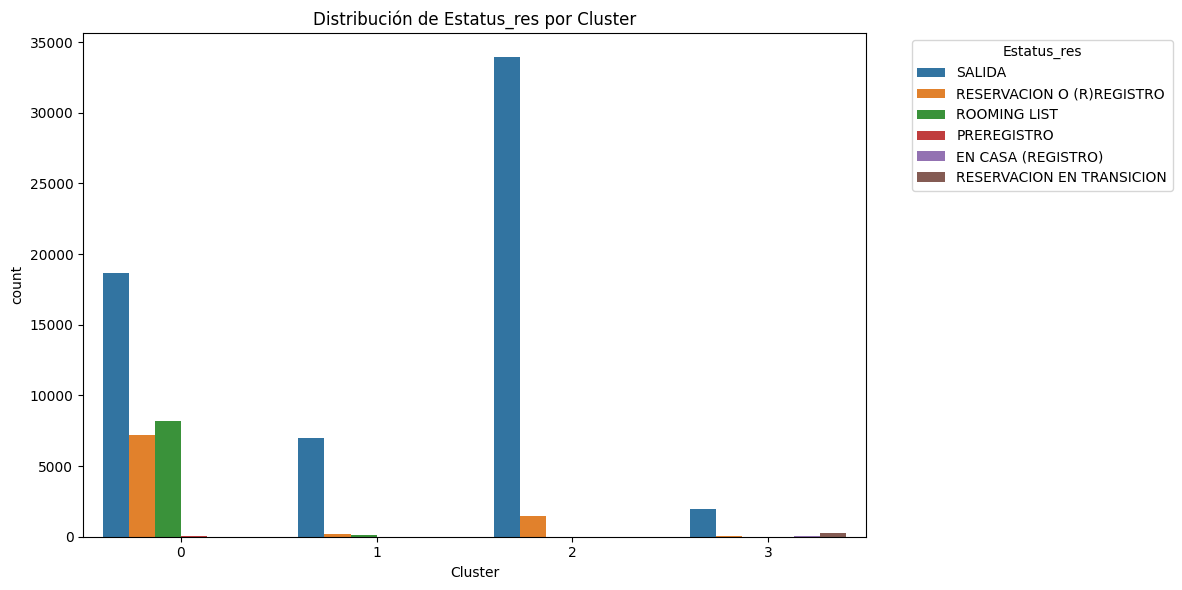

In [8]:
# Añadimos las etiquetas de los clusters al dataframe
df_selected['Cluster'] = labels_final

# Variables numéricas para análisis
numeric_features = ['Capacidad_hotel', 'Numero_personas', 'Numero_adultos', 'Numero_noches', 'IngresoMto']

# Gráficos para variables numéricas
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 5 * len(numeric_features)))
for i, col in enumerate(numeric_features):
    sns.barplot(x='Cluster', y=col, data=df_selected, ax=axes[i], ci=None)
    axes[i].set_title(f'Media de {col} por Cluster')
plt.tight_layout()
plt.show()

# Variables categóricas para análisis
categorical_features = ['Tipo_Habitacion', 'Clasificacion_tipo_habitacion', 'Paquete', 'Canal', 'Estatus_res']

# Gráficos para variables categóricas
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Cluster', hue=feature, data=df_selected)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Asumimos que 'data_transformed' son tus datos preprocesados y 'labels_final' las etiquetas de clusters del modelo final
silhouette_avg = silhouette_score(data_transformed, labels_final)
print(f"El índice Silhouette promedio es: {silhouette_avg}")

El índice Silhouette promedio es: 0.07627543774723416


In [10]:
#log-Likelihood
log_likelihood = pipeline_final.score(df_selected)
print(f"Log-Likelihood: {log_likelihood}")

Log-Likelihood: 274.18534209419414


In [11]:
# Fit the full pipeline
pipeline_final.fit(df_selected)

# Create a new pipeline for transformation only (up to but not including the GMM)
transform_only_pipeline = Pipeline(steps=pipeline_final.steps[:-1])

# Transform the data using the same preprocessing as during training
data_transformed_for_bic = transform_only_pipeline.transform(df_selected)

# Now use the transformed data for BIC and AIC calculations
bic = pipeline_final.named_steps['clusterer'].bic(data_transformed_for_bic)
aic = pipeline_final.named_steps['clusterer'].aic(data_transformed_for_bic)
print(f"BIC: {bic}")
print(f"AIC: {aic}")

BIC: -43328169.10405749
AIC: -43420402.489351556
